In [1]:
%matplotlib notebook
from ipywidgets import interactive, widgets
import matplotlib.pyplot as plt
import numpy as np

# Time domain solution for HW3 Summer 2022
This notebook plots the time domain solution $V_C(t)$ for the series RLC circuit in the question, for $t>0$.
You can change parameters using sliders and see the effect on the waveform.

<IPython.core.display.Javascript object>


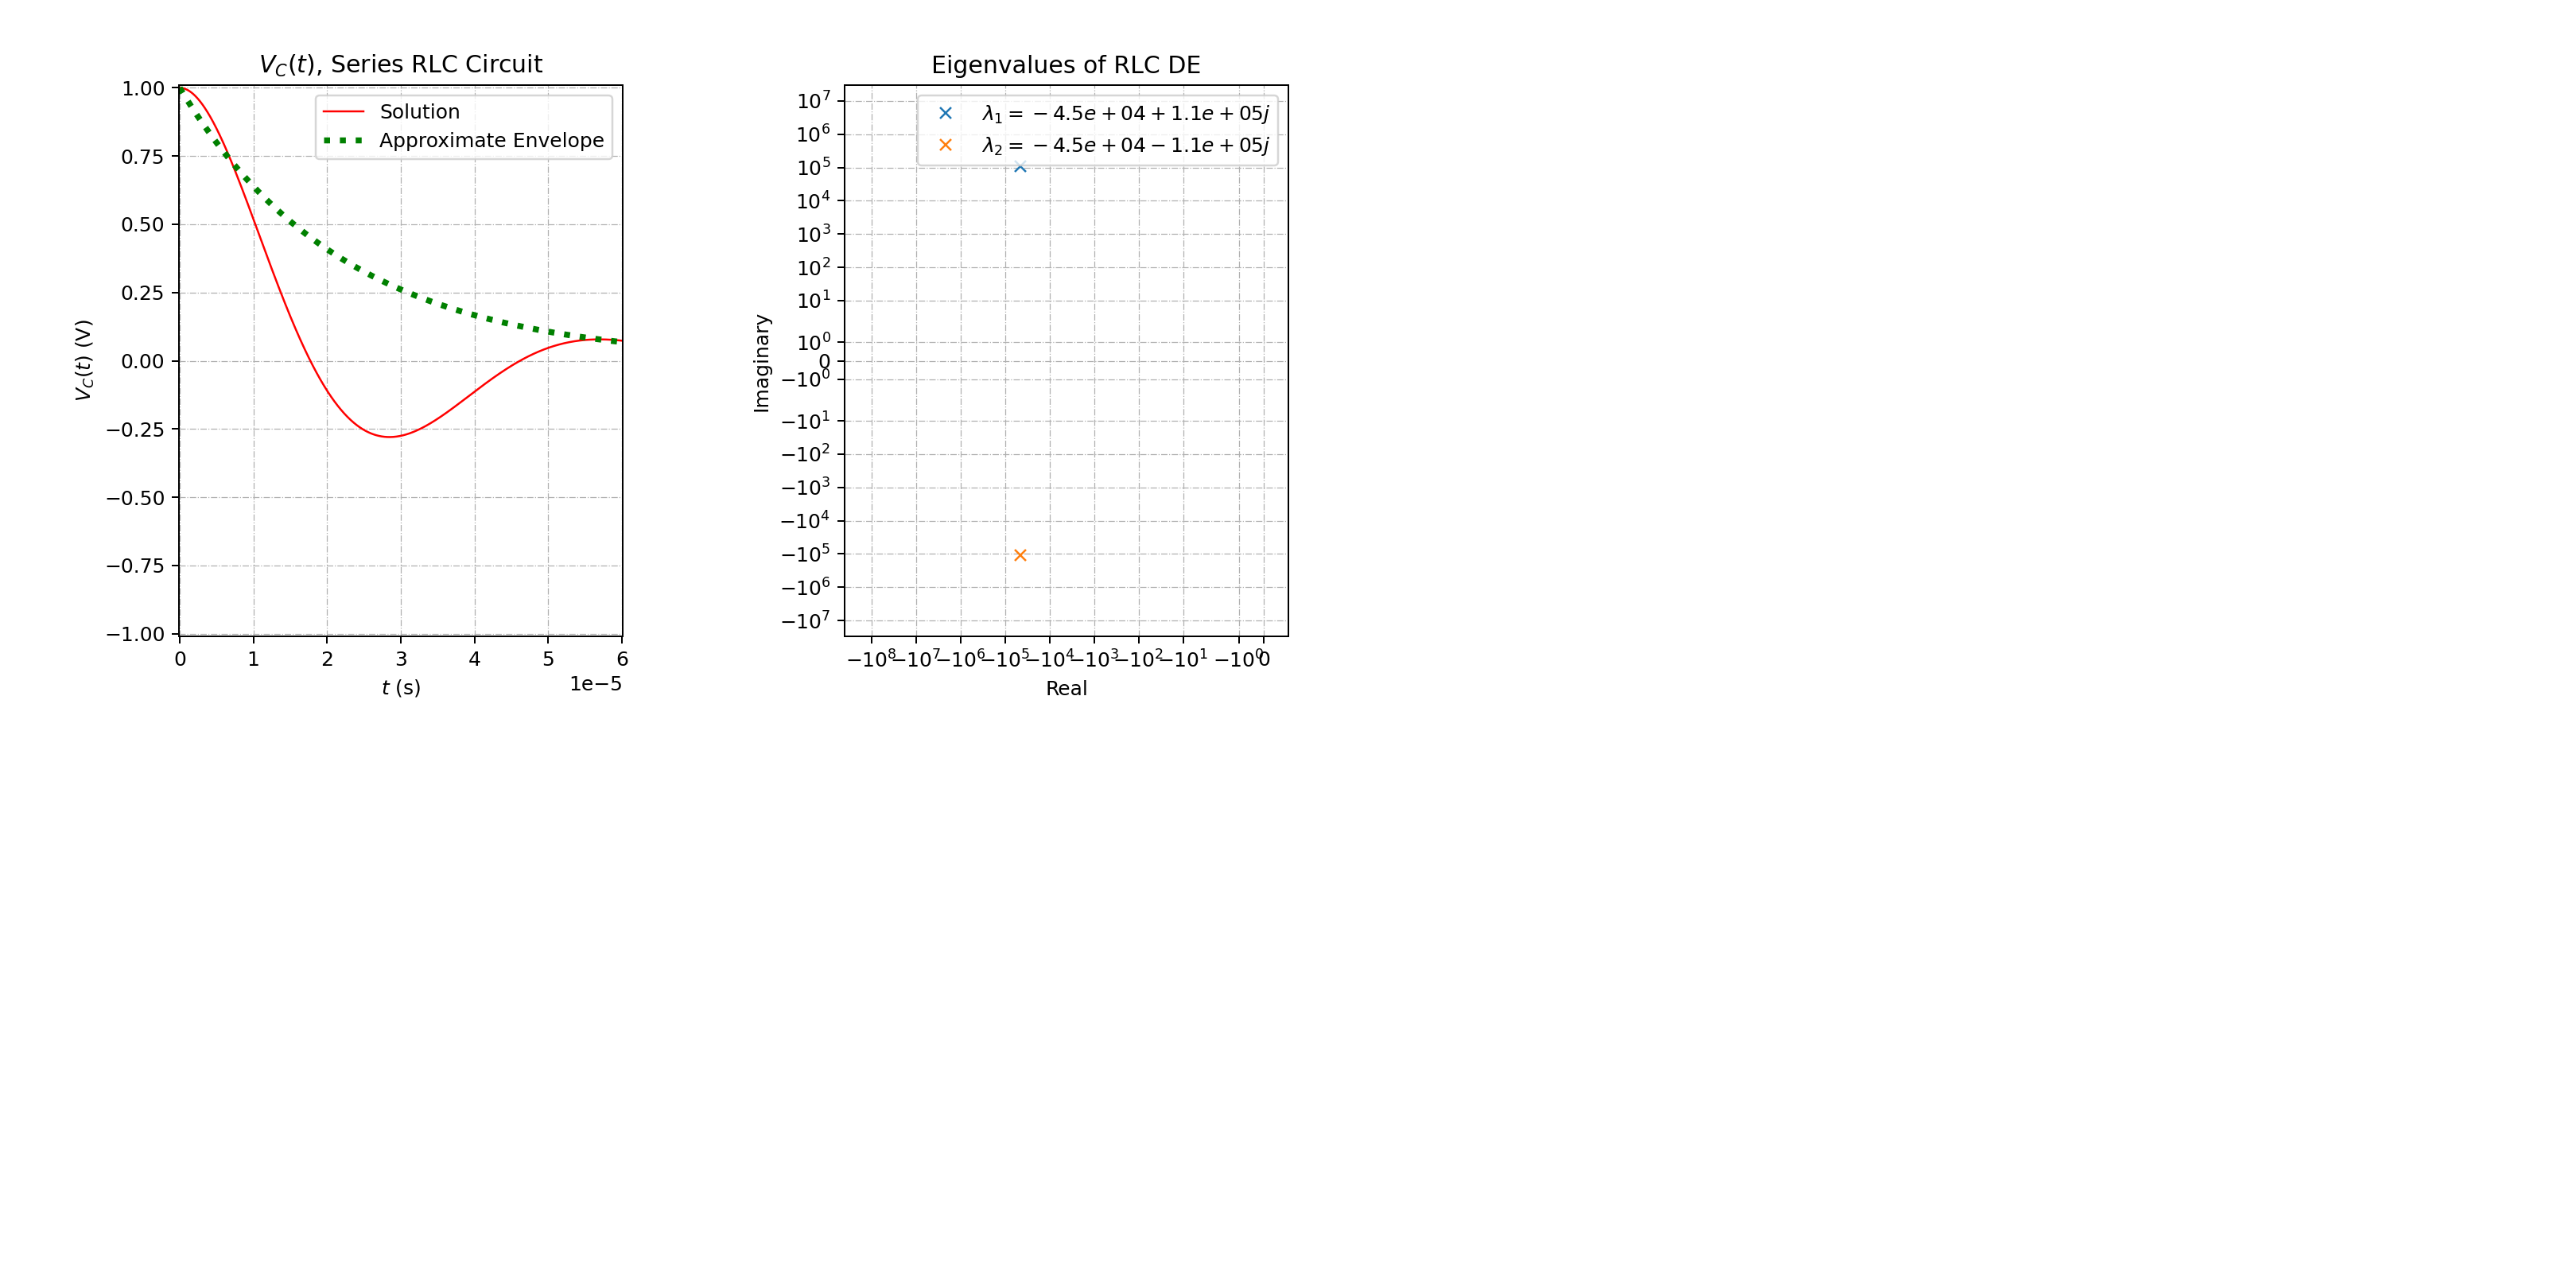

interactive(children=(FloatLogSlider(value=1.0, description='R (Ω)', min=-3.0, step=0.05), FloatLogSlider(valu…

In [2]:
def vc(t, initcond, f0, alpha): # solution for vc of t given an initial condition
    """
        vc(t) = K1 e^{lambda_1 t} + K2 e^{lambda_1 t}, where:
            lambda1/2 = -alpha +- sqrt(alpha^2 - 4 pi^2 f0^2)
            K1 = vc(0)/(1-lambda1/lambda2)
            K2 = vc(0) - K1
    """
    sqrtterm = np.sqrt(alpha**2 - 4 * np.pi**2 * f0**2 + 0j)
    lambda1 = -alpha + sqrtterm
    lambda2 = -alpha - sqrtterm
    K1 = initcond / (1 - lambda1 / lambda2 + 1e-10)
    K2 = initcond - K1
    return np.real(K1 * np.exp(lambda1 * t) + K2 * np.exp(lambda2 * t))

def vcenvelope(t, initcond, f0, alpha): # approximate envelope for vc of t given an initial condition
    """
        vc(t) = K1 e^{lambda_1 t} + K2 e^{lambda_1 t}, where:
            lambda1/2 = -alpha +- sqrt(alpha^2 - 4 pi^2 f0^2)
            K1 = vc(0)/(1-lambda1/lambda2)
            K2 = vc(0) - K1
    """
    if (4 * np.pi**2 * f0**2 < alpha**2):
        sqrtterm = np.sqrt(alpha**2 - 4 * np.pi**2 * f0**2 + 0j)
        lambda1 = -alpha + sqrtterm
        lambda2 = -alpha - sqrtterm
        K1 = initcond / (1 - lambda1 / lambda2 + 1e-10)
        K2 = initcond - K1
        return np.real(0 + K1 * np.exp(lambda1 * t) + K2 * np.exp(lambda2 * t))
    else:
        sqrtterm = 0
        lambda1 = -alpha
        K1 = initcond
        return np.real(K1 * np.exp(lambda1 * t))
    
def get_eigenvalues(R, L, C):
    """
    Given an list A matrix, find their eigenvalues and plot them on the complex plane. 
    Additionally, the unit circle is plotted as a dashed line. Additionally, each A matrix can be given a label, 
    which will be used to identify that matrix's eigenvalues in a legend.
    
    Args:
        a_matrices: the system A-matrices.
        labels: list of legend entries, one for each A matrix.
    """
    if R == .001: # Make the minimum just 0
        root = np.sqrt(1 / L / C)
        print("Making R = 0 instead of 0.001")
        return np.array([root * 1j, -root * 1j])
    real = -1/2 * R / L
    discrim = R * R / L / L - 4 / L / C
    imag = 1/2 * np.sqrt(np.array(discrim, dtype=complex))
    return np.array([real + imag, real - imag])
    
    markers=['o','x','1','8','*','+'];
    if labels:
        plt.legend(loc='upper right')


# Setup initial values
R = 1      # 1Ω
C = 10e-9  # 10nF
L = 25e-6  # 25μH
f0 = 1 / np.sqrt(L * C) / 2 / np.pi
alpha = R / (2 * L)
eigenvalues = get_eigenvalues(R, L, C)

# Create range of t values
n_cycles = 20
pts_per_cycle = 50
N = pts_per_cycle * n_cycles
ts = 1 / f0 * n_cycles * np.array(range(0, N + 1)) /N

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)


# Plot V_C and envelope
l, = ax1.plot(ts, vc(ts, 1, f0, alpha), linewidth=1, color='red', linestyle='-', label="Solution") 
lenv, = ax1.plot(ts, vcenvelope(ts, 1, f0, alpha), color='green', linewidth=3, linestyle=':', label="Approximate Envelope") 

# Add grid, labels, legend
ax1.grid(linestyle='-.', linewidth=0.5) # shows the grid
ax1.ticklabel_format(style='sci', scilimits=(-2, 2))
ax1.set_xlim([-0.01e-5, 6e-5 + 0.01e-5])
ax1.set_ylim([-1.01, 1.01])
ax1.set_xlabel('$t$ (s)') # 
ax1.set_ylabel('$V_C(t)$ (V)')
ax1.set_title('$V_C(t)$, Series RLC Circuit')
ax1.legend(loc="upper right")

# Plot eigenvalues and unit circle
eig1, = ax2.plot(np.real(eigenvalues[0]), np.imag(eigenvalues[0]), linestyle='None', marker='x', label="Eigenvalues")
eig2, = ax2.plot(np.real(eigenvalues[1]), np.imag(eigenvalues[1]), linestyle='None', marker='x', label="Eigenvalues")
t = np.linspace(0, 2 * np.pi, 1000)

# Add grid, labels, legend
ax2.grid(linestyle='-.', linewidth=0.5)
ax2.ticklabel_format(style='sci', scilimits=(-2, 2))
ax2.set_xscale("symlog")
ax2.set_xlim([-4e8, 1e0])
ax2.set_yscale("symlog")
ax2.set_ylim([-3e7, 3e7])
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')
ax2.set_title('Eigenvalues of RLC DE')
ax2.legend([f"$\lambda_1 = {eigenvalues[0]:.1e}$", f"$\lambda_2 = {eigenvalues[1]:.1e}$"], loc="upper right")

# Main update function for plot
def update(R=1, C=10e-9):
    alpha = R / (2 * L)
    f0 = 1 / (2 * np.pi * np.sqrt(L * C))
    eigenvalues = get_eigenvalues(R, L, C)

    l.set_ydata(vc(ts, 1, f0, alpha))
    lenv.set_ydata(vcenvelope(ts, 1, f0, alpha))
    eig1.set_xdata(np.real(eigenvalues[0]))
    eig2.set_xdata(np.real(eigenvalues[1]))
    eig1.set_ydata(np.imag(eigenvalues[0]))
    eig2.set_ydata(np.imag(eigenvalues[1]))
    ax2.legend([f"$\lambda_1 = {eigenvalues[0]:.1e}$", f"$\lambda_2 = {eigenvalues[1]:.1e}$"], loc="upper right")
    fig.canvas.draw_idle()

# Include sliders for relevant quantities
R_slider = widgets.FloatLogSlider(value=1.0, base=10, min=-3, max=4, step=.05, description="R (Ω)")
C_slider = widgets.FloatLogSlider(value=10e-9, min=-10, max=-4, step=.05, description="C (F)", readout_format=".1e")
interactive(update, 
            R=R_slider,
            C=C_slider)


## CHANGELOG
 - 2019/02/13: initial version (code based on slider_demo.py in the matplotlib documentation). JR <jr@berkeley.edu>
 - 2019/09: Adapted for Fall 2019
 - 2021/09/16: Changed to use ipywidgets, cleaned for Fall 2021. MD <mdanielczuk@berkeley.edu>
 - 2021/09/17: Added eigenvalue plot as subplot, printing eigenvalues. <avangipuram@berkeley.edu>